In [1]:
import argparse
import sys
from multiprocessing import cpu_count
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import datasets
import models
import torch_burn as tb
import utils

In [2]:
CHECKPOINT_DIR = Path('checkpoint/BaselineCNN')
CHECKPOINT_DIR.mkdir(parents=True, exist_ok=True)

tb.seed_everything(0)

DATA_FILEPATH = 'data/pth_nostd/C2-T18-win48-hop1.pth'

In [3]:
train_ds, valid_ds, datainfo = datasets.make_dataset(DATA_FILEPATH)

In [4]:
len(train_ds), len(valid_ds)

(177937, 176476)

In [5]:
model = models.BaselineCNN1d(6, 3).cuda()

In [6]:
criterion = nn.MSELoss().cuda()

In [7]:
optimizer = torch.optim.Adam(model.parameters())

In [8]:
metrics = [tb.metrics.ModuleMetric(criterion, 'loss'),
           utils.HPMetric('hp_metric'),
           utils.HPSignalHistory(CHECKPOINT_DIR / 'sample' / '{epoch:04d}.npy', 'hp_signal')]

In [9]:
callbacks = [tb.callbacks.EarlyStopping(metrics[0])]

In [10]:
trainer = tb.Trainer(model, optimizer, metrics, callbacks, ncols=100)

In [11]:
trainer.fit(train_ds, valid_ds, start_epoch=1, num_epochs=40, batch_size=256, pin_memory=True)

[0002/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   8.582788
 - Pitch        :   1.750131
 - Roll         :   3.103926
 - RMS          :   5.365369
 - 99% Tile     :  18.149671
Save output signals into checkpoint/BaselineCNN/sample/0001.npy


[0003/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   8.679308
 - Pitch        :   3.878420
 - Roll         :   1.217687
 - RMS          :   5.533392
 - 99% Tile     :  15.807360
Save output signals into checkpoint/BaselineCNN/sample/0002.npy


[0004/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   8.591153
 - Pitch        :   1.795706
 - Roll         :   0.962365
 - RMS          :   5.097667
 - 99% Tile     :  15.680321
Save output signals into checkpoint/BaselineCNN/sample/0003.npy


[0004/0040] Validation: 100%|███████████████████| 690/690 [00:02<00:00, 337.26it/s, val_loss 0.0091]


                  validation
 - Yaw          :   3.254533
 - Pitch        :   7.694431
 - Roll         :   1.517386
 - RMS          :   4.902337
 - 99% Tile     :  13.010416
Save output signals into checkpoint/BaselineCNN/sample/0004.npy


[0006/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   4.280448
 - Pitch        :   2.500245
 - Roll         :   1.120567
 - RMS          :   2.934231
 - 99% Tile     :  13.147480
Save output signals into checkpoint/BaselineCNN/sample/0005.npy


[0007/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   7.656629
 - Pitch        :   4.203067
 - Roll         :   1.140723
 - RMS          :   5.085633
 - 99% Tile     :  16.351362
Save output signals into checkpoint/BaselineCNN/sample/0006.npy


[0008/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   6.449742
 - Pitch        :   2.804308
 - Roll         :   3.292614
 - RMS          :   4.483474
 - 99% Tile     :  14.720565
Save output signals into checkpoint/BaselineCNN/sample/0007.npy


[0008/0040] Validation: 100%|███████████████████| 690/690 [00:02<00:00, 334.57it/s, val_loss 0.0039]


                  validation
 - Yaw          :   2.320056
 - Pitch        :   3.202537
 - Roll         :   2.615782
 - RMS          :   2.737470
 - 99% Tile     :  11.232868
Save output signals into checkpoint/BaselineCNN/sample/0008.npy


[0010/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :  10.172182
 - Pitch        :   1.377420
 - Roll         :   0.884680
 - RMS          :   5.948480
 - 99% Tile     :  16.402159
Save output signals into checkpoint/BaselineCNN/sample/0009.npy


[0011/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   7.617585
 - Pitch        :   2.563737
 - Roll         :   0.918527
 - RMS          :   4.670619
 - 99% Tile     :  14.895813
Save output signals into checkpoint/BaselineCNN/sample/0010.npy


[0012/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 3 epochs
                  validation
 - Yaw          :  10.211092
 - Pitch        :   2.223137
 - Roll         :   1.697230
 - RMS          :   6.112537
 - 99% Tile     :  17.102504
Save output signals into checkpoint/BaselineCNN/sample/0011.npy


[0013/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 4 epochs
                  validation
 - Yaw          :   6.044312
 - Pitch        :   1.415434
 - Roll         :   3.158636
 - RMS          :   4.021365
 - 99% Tile     :  13.829452
Save output signals into checkpoint/BaselineCNN/sample/0012.npy


[0014/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   3.057834
 - Pitch        :   1.587133
 - Roll         :   2.569774
 - RMS          :   2.481470
 - 99% Tile     :  12.000360
Save output signals into checkpoint/BaselineCNN/sample/0013.npy


[0015/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.364074
 - Pitch        :   1.669302
 - Roll         :   0.978896
 - RMS          :   1.763864
 - 99% Tile     :  11.346130
Save output signals into checkpoint/BaselineCNN/sample/0014.npy


[0016/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   3.261302
 - Pitch        :   1.349078
 - Roll         :   2.491684
 - RMS          :   2.494300
 - 99% Tile     :  11.676524
Save output signals into checkpoint/BaselineCNN/sample/0015.npy


[0017/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   8.813822
 - Pitch        :   2.772177
 - Roll         :   1.321231
 - RMS          :   5.388694
 - 99% Tile     :  15.595966
Save output signals into checkpoint/BaselineCNN/sample/0016.npy


[0018/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 3 epochs
                  validation
 - Yaw          :   2.420720
 - Pitch        :   1.540104
 - Roll         :   0.840662
 - RMS          :   1.726125
 - 99% Tile     :  11.501939
Save output signals into checkpoint/BaselineCNN/sample/0017.npy


[0019/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 4 epochs
                  validation
 - Yaw          :   5.891236
 - Pitch        :   2.908978
 - Roll         :   0.851136
 - RMS          :   3.825060
 - 99% Tile     :  13.829838
Save output signals into checkpoint/BaselineCNN/sample/0018.npy


[0020/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 5 epochs
                  validation
 - Yaw          :   4.290239
 - Pitch        :   3.097954
 - Roll         :   1.040709
 - RMS          :   3.113762
 - 99% Tile     :  12.917858
Save output signals into checkpoint/BaselineCNN/sample/0019.npy


[0021/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 6 epochs
                  validation
 - Yaw          :   5.266274
 - Pitch        :   2.117563
 - Roll         :   1.055998
 - RMS          :   3.333309
 - 99% Tile     :  13.410613
Save output signals into checkpoint/BaselineCNN/sample/0020.npy


[0022/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 7 epochs
                  validation
 - Yaw          :   3.738687
 - Pitch        :   2.890849
 - Roll         :   1.729214
 - RMS          :   2.905453
 - 99% Tile     :  12.280133
Save output signals into checkpoint/BaselineCNN/sample/0021.npy


[0023/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 8 epochs
                  validation
 - Yaw          :   2.933379
 - Pitch        :   1.735245
 - Roll         :   1.220366
 - RMS          :   2.090062
 - 99% Tile     :  11.606993
Save output signals into checkpoint/BaselineCNN/sample/0022.npy


[0024/0040] Train:   0%|                                                    | 0/696 [00:00<?, ?it/s]

val_loss is not improved for 9 epochs
                  validation
 - Yaw          :   2.973384
 - Pitch        :   1.945182
 - Roll         :   1.834291
 - RMS          :   2.308634
 - 99% Tile     :  12.173365
Save output signals into checkpoint/BaselineCNN/sample/0023.npy


[0024/0040] Validation: 100%|███████████████████| 690/690 [00:02<00:00, 323.54it/s, val_loss 0.0039]

val_loss is not improved for 10 epochs
Stop training because val_loss did not improved for 10 epochs
                  validation
 - Yaw          :   2.936614
 - Pitch        :   3.240543
 - Roll         :   0.906391
 - RMS          :   2.578525
 - 99% Tile     :  12.015723
Save output signals into checkpoint/BaselineCNN/sample/0024.npy


# 그래프 그리기

In [3]:
graph_file = 'checkpoint/BaselineCNN/sample/0014.npy'

In [4]:
graph_data = np.load(graph_file)

In [5]:
yaw_gt, pitch_gt, roll_gt, yaw, pitch, roll = graph_data

In [6]:
title = 'BaselineCNN1d'
GRAPH_FILEPATH = CHECKPOINT_DIR / f'graph-{Path(graph_file).stem}.png'
s = 1500
t = 2100

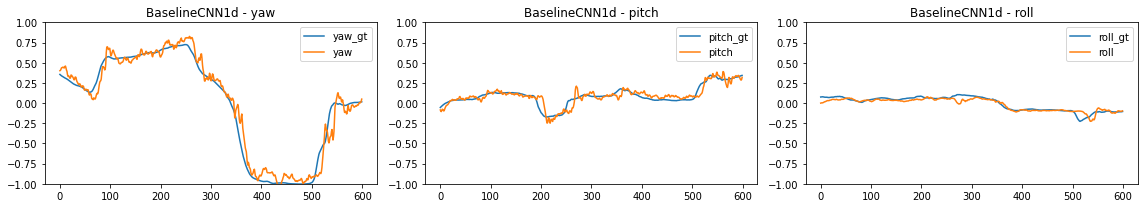

In [7]:
plt.figure(figsize=(16, 3))

plt.subplot(1, 3, 1)
plt.plot(yaw_gt[s:t])
plt.plot(yaw[s:t])
plt.legend(['yaw_gt', 'yaw'])
plt.title(title + ' - yaw')
plt.ylim(-1, 1)

plt.subplot(1, 3, 2)
plt.plot(pitch_gt[s:t])
plt.plot(pitch[s:t])
plt.legend(['pitch_gt', 'pitch'])
plt.title(title + ' - pitch')
plt.ylim(-1, 1)

plt.subplot(1, 3, 3)
plt.plot(roll_gt[s:t])
plt.plot(roll[s:t])
plt.legend(['roll_gt', 'roll'])
plt.title(title + ' - roll')
plt.ylim(-1, 1)

plt.tight_layout()
plt.savefig(GRAPH_FILEPATH)
plt.show()